# Проверка центральной предельной теоремы на примере треугольного распределения

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

## В качестве непрерывного распреления возьмем &ndash; треугольное распределение
*a &ndash; нижний предел (a&le;b)  
c &ndash; наиболее вероятное (a&le;c&le;b)  
b &ndash; верхний предел (c&le;b)*

In [103]:
a = 0
b = 1
c = 0.25
rv = sts.triang(c = (c - a) / (b - a), loc = a, scale = b - a)

## График функции плотности вероятности выбранного распределения

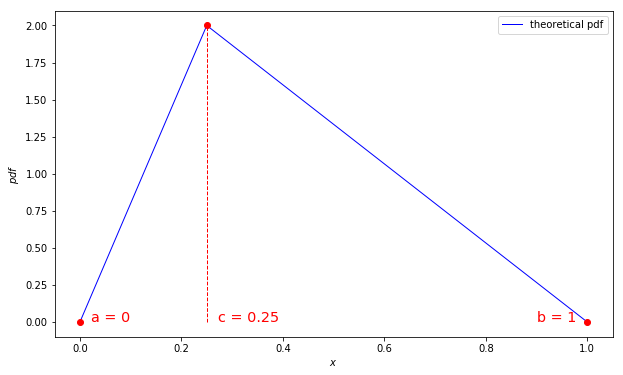

In [122]:
x = np.linspace(a, b, sampleSize)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, rv.pdf(x), 'b', lw=1, label='theoretical pdf')
markedPoints = [a, c, b]
ax.plot(markedPoints, rv.pdf(markedPoints), 'ro')
ax.vlines(x = c, ymin = 0, ymax = rv.pdf(c), linestyles = '--', lw = 1, colors = 'r')
ax.text(a + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0]), 0, 'a = {}'.format(a), color = 'r', size="x-large")
ax.text(c + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0]), 0, 'c = {}'.format(c), color = 'r', size="x-large")
ax.text(b - 0.09 * (ax.get_xlim()[1] - ax.get_xlim()[0]), 0, 'b = {}'.format(b), color = 'r', size="x-large")
ax.set_xlabel('$x$')
ax.set_ylabel('$pdf$')
ax.legend()
plt.show()

## Параметры треугольного распределения
*Плотность треугольного распределения:  
$f(x) = \begin{cases}
\frac{2(x-a)}{(b-a)(c-a)} & \text{$x\in[a,c]$}\\
\frac{2(b-x)}{(b-a)(b-c)} & \text{$x\in[c,b]$}\\
0 & \text{$x\notin[a,b]$}
\end{cases}$  
Математическое ожидание:  
$M=\frac{a+b+c}{3}$  
Дисперсия:  
$D=\frac{a^2+b^2+c^2-ab-ac-bc}{18}$*  
Источник: https://www.matematicus.ru/zakony-raspredeleniya-sluchajnoj-velichiny/treugolnoe-raspredelenie

In [118]:
mean = (a + b + c) / 3
variance = (a ** 2 + b ** 2 + c ** 2 - a * b - a * c - b * c) / 18
print('Значения M и D по формуле: M - {}, D - {}'.format(round(mean, 5), round(variance, 5)))
M, D = rv.stats()
print('Значения M и D из метода stats распределения triang: M - {}, D - {}'.format(round(float(M), 5), round(float(D), 5)))

Значения M и D по формуле: M - 0.41667, D - 0.04514
Значения M и D из метода stats распределения triang: M - 0.41667, D - 0.04514


## Сгенерируем выборку объема 1000

In [120]:
sampleSize = 1000
sample = rv.rvs(size=sampleSize)

## Гистограмма выборки

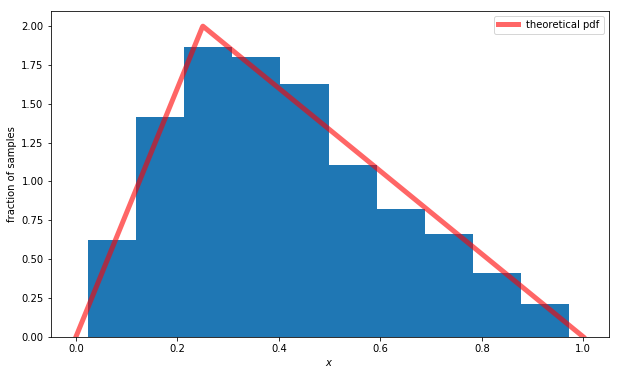

In [129]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(sample, density=True)
ax.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='theoretical pdf')
ax.set_ylabel('fraction of samples')
ax.set_xlabel('$x$')
ax.legend()
plt.show()

## Генерация 1000 выборок разных объемов (3, 5, 10, 50)

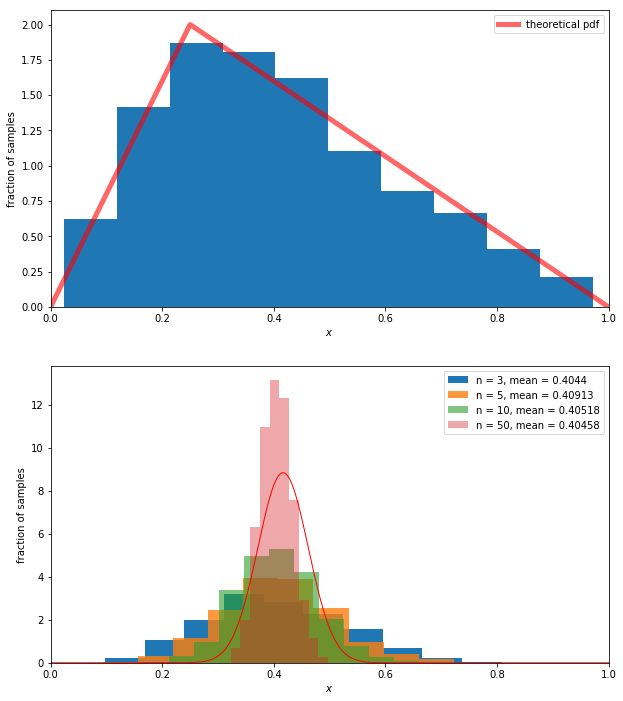

In [121]:
fig, ax = plt.subplots(2, 1, figsize=(10,12))
ax_theory = ax[0]
ax_test = ax[1]
ax_theory.hist(sample, density=True)
ax_theory.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='theoretical pdf')
ax_theory.set_ylabel('fraction of samples')
ax_theory.set_xlabel('$x$')
ax_theory.set_xlim(a, b)
ax_theory.legend()
numTrials = 1000
n = [3, 5, 10, 50]
meanOfMeans = {}
for nSize in n:
    current_nMean = []
    for t in range(numTrials):
        n_sample = np.random.choice(sample, nSize)
        current_nMean.append(sum(n_sample) / len(n_sample))
    meanOfMeans[nSize] = current_nMean
x = np.linspace(a, b, numTrials)
alpha = 1
for nSize in n:
    ax_test.hist(meanOfMeans[nSize],
                 density=True,
                 alpha = alpha,
                 label = 'n = {0}, mean = {1}'.format(nSize, round(sum(meanOfMeans[nSize]) / numTrials, 5)))
    alpha -= 0.2
ax_test.set_ylabel('fraction of samples')
ax_test.set_xlabel('$x$')
ax_test.set_xlim(a, b)
ax_test.legend()
norm_rv = sts.norm(mean, variance)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, 'r-', lw=1, label='theoretical pdf')
plt.show()